# Imports

In [2]:
# imports for the exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# importing the dataset

df = pd.read_csv('/home/caria/MEDM/in-vehicle-coupon-recommendation.csv')

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Exploratory Data Analysis

## Initial Data Inspection

In [4]:
# Shape of the dataset

df.shape

(12684, 26)

In [5]:
# Data types of the columns

df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

## Descriptive Statistics

In [6]:
# mean, median, mode, min, max, std, variance of the dataset

df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# immediately, we notice that toCoupon_GEQ variables can be transformed into one ordered number variable
# i.e. we will create a single variable toCoupon_GEQ which will be
# 5 if toCoupon_GEQ25min is 1, toCoupon_GEQ15min is 0 and toCoupon_GEQ5min is 0
# 15 if toCoupon_GEQ25min is 1, toCoupon_GEQ15min is 1 and toCoupon_GEQ5min is 0
# 25 if toCoupon_GEQ25min is 1, toCoupon_GEQ15min is 1 and toCoupon_GEQ5min is 1

for i in range(len(df)):
    if df.loc[i, 'toCoupon_GEQ25min'] == 1:
        df.loc[i, 'toCoupon_GEQ'] = 25
    elif df.loc[i, 'toCoupon_GEQ15min'] == 1:
        df.loc[i, 'toCoupon_GEQ'] = 15
    elif df.loc[i, 'toCoupon_GEQ5min'] == 1:
        df.loc[i, 'toCoupon_GEQ'] = 5

# we will now drop the columns toCoupon_GEQ25min, toCoupon_GEQ15min and toCoupon_GEQ5min
df = df.drop(['toCoupon_GEQ25min', 'toCoupon_GEQ15min', 'toCoupon_GEQ5min'], axis = 1)

In [8]:
# skewness and kurtosis of the dataset

# however, we notice that skewness and kurtosis of the dataset is not available

In [9]:
# checking for missing values
# remember, 12684 is the total number of observations

df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
direction_same              0
direction_opp               0
Y                           0
toCoupon_GEQ                0
dtype: int64

In [10]:
# variable car has 12576 out of 12684 missing values, so we can drop it

df.drop('car', axis=1, inplace=True)


In [11]:
# the other variables with MVs are Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
# thus, we perform imputation (categorical variables)

# 1st method: imputation with mode
df1 = df.copy()
df1['Bar'].fillna(df1['Bar'].mode()[0], inplace=True)
df1['CoffeeHouse'].fillna(df1['CoffeeHouse'].mode()[0], inplace=True)
df1['CarryAway'].fillna(df1['CarryAway'].mode()[0], inplace=True)
df1['RestaurantLessThan20'].fillna(df1['RestaurantLessThan20'].mode()[0], inplace=True)
df1['Restaurant20To50'].fillna(df1['Restaurant20To50'].mode()[0], inplace=True)



# Important Stuff

## Age vs Marital Status

We ended up not grouping the two variables. Eventhough we might still want to take a look at that.

The biggest problem imo is that all categories except widowed appear in all age groups.

As such, I'm not sure if we can act on this information.

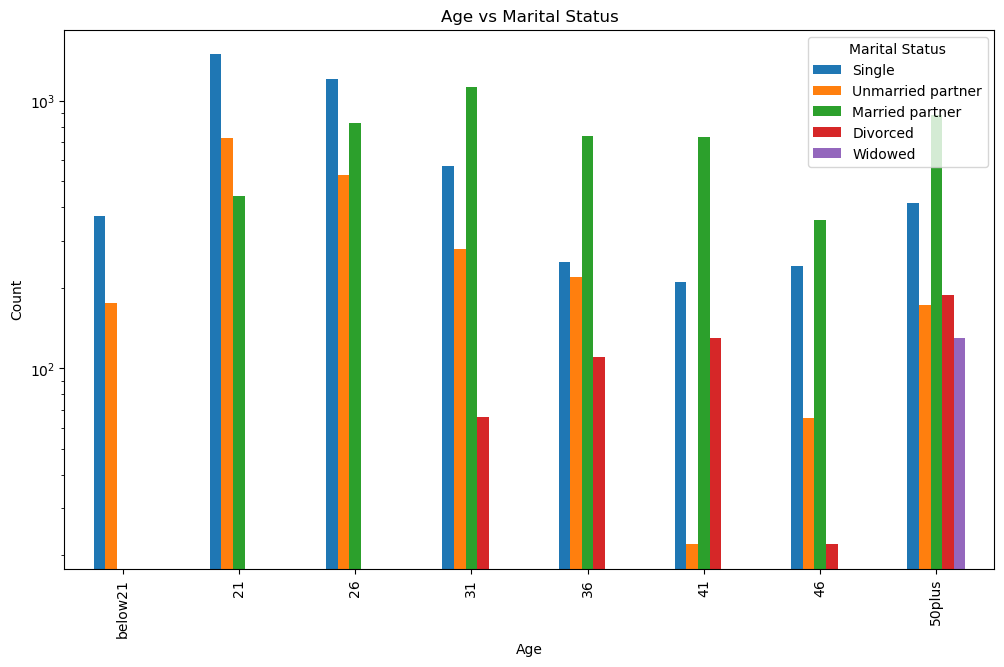

In [12]:
# analyzing age vs marital status

# defining the nice way to visualize the 'age' categories
custom_order_Age = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# defining the nice way to visualize the 'maritalStatus' categories
custom_order_MS = ['Single','Unmarried partner','Married partner','Divorced','Widowed']

# Pivoting the data to get counts of each combination
pivot_df = df.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)

# Ordering the data based on the custom orders
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]

# Plotting grouped bar plot
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=False)
plt.xlabel('Age')
plt.ylabel('Count')
# adding log scale to the y-axis
plt.yscale('log')
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()



In [30]:
# check dataset column names

print(df.columns)

# 

print('\n')

print(df['expiration'].value_counts())

#print(df['maritalStatus'].value_counts())



Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'direction_opp', 'Y', 'toCoupon_GEQ'],
      dtype='object')


expiration
1d    7091
2h    5593
Name: count, dtype: int64


## Mutual Information Feature Selection

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Assuming your target variable column name is 'Y'
X = df.drop(columns='Y')
y = df['Y']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame for MI scores and sort them in descending order
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score with Target': mi_scores
}).sort_values(by='MI Score with Target', ascending=False)

print(mi_df)
